Data Loading...
25000 Training Sequence
25000 Test Sequence
Sequence Padding (Samples * time)
Size of x_train (25000, 1000)
Size of x_test (25000, 1000)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 128)         6400000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 994, 32)           28704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 198, 32)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 192, 32)           7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (Non

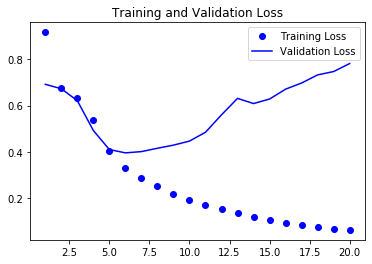

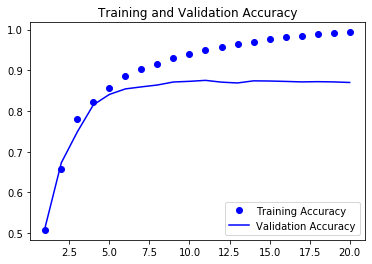

CPU times: user 8min 12s, sys: 52.9 s, total: 9min 5s
Wall time: 3min 1s


In [3]:
%%time

#3:03 
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

# IMDB Preprocessing

max_features = 50000
max_len = 1000

print('Data Loading...')
imdb_data = tf.keras.datasets.imdb

(x_train, y_train), (x_test, y_test) = imdb_data.load_data(num_words = max_features)
print(len(x_train), 'Training Sequence')
print(len(x_test), 'Test Sequence')

print('Sequence Padding (Samples * time)')

x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)
print('Size of x_train', x_train.shape)
print('Size of x_test', x_test.shape)

# 1D ConvNet for IMDB data (training & evaluation)

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length = max_len))
model.add(layers.Conv1D(32, 7, activation = 'relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation = 'relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

'''
GlobalAveragePooling1D, GlobalMaxPooling1D 풀링은 
(samples, timestpes, features) 크기의 텐서를 입력받아 (samples, features) 크기의 텐서를 출력.
즉 시간 축 전체에 풀링을 적용.

GlobalAveragePooling2D, GlobalMaxPooling2D 풀링은
(samples, height, width, channels) 크기의 텐서를 입력받고 (samples, channels) 크기의 텐서를 출력.
즉 특성 맵 공간 차원 전체에 대한 풀링
'''

model.summary()

model.compile(optimizer = RMSprop(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_split = 0.2)

# Result Graph

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss ,'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc ,'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.show()